# Wine Quality EDA

#### Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

#### Dataset

In [2]:
# Read in dataset as pandas dataframe
dataset = pd.read_csv('winequality.csv')
winequality = pd.DataFrame(dataset)

# Remove row count column "Unnamed: 0"
winequality = winequality.drop('Unnamed: 0', axis = 1)
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


#### Histograms

In [ ]:
# Determine number of variables for subplotting
print(len(winequality.columns))

# Adjust figure size and colors
plt.figure(figsize = (14, 28))
plt.grid(False)
cmap = get_cmap('viridis', 14)
colors = cmap.colors

# Initialize count for plot location
count = 1

# Initialize variable to store column means
col_means = winequality.mean()
Bins = 20

# Loop through each variable and plot
for col in winequality.columns:
    if winequality[col].dtypes != 'O':
        plt.subplot(7, 2, count)
        plt.hist(winequality[col], bins = Bins, color = colors[count])
        plt.axvline(col_means[col], color = 'r', label = 'Mean')
        plt.grid(False)
        plt.title(col)
        plt.legend()
    else: # Specifically for plotting wine type, weren't sure if you wanted us to plot this as well
        plt.subplot(7, 2, count)
        plt.hist(winequality[col], color = colors[count])
        plt.grid(False)
        plt.title(col)
    count += 1

#### Correlations

alcohol              density                -0.686745
volatile acidity     total sulfur dioxide   -0.414476
citric acid          volatile acidity       -0.377981
residual sugar       alcohol                -0.359415
free sulfur dioxide  volatile acidity       -0.352557
                                               ...   
fixed acidity        density                 0.458910
residual sugar       total sulfur dioxide    0.495482
                     density                 0.552517
free sulfur dioxide  total sulfur dioxide    0.720934
fixed acidity        fixed acidity           1.000000
Length: 67, dtype: float64


Text(0.5, 1.0, 'Wine Quality Correlations')

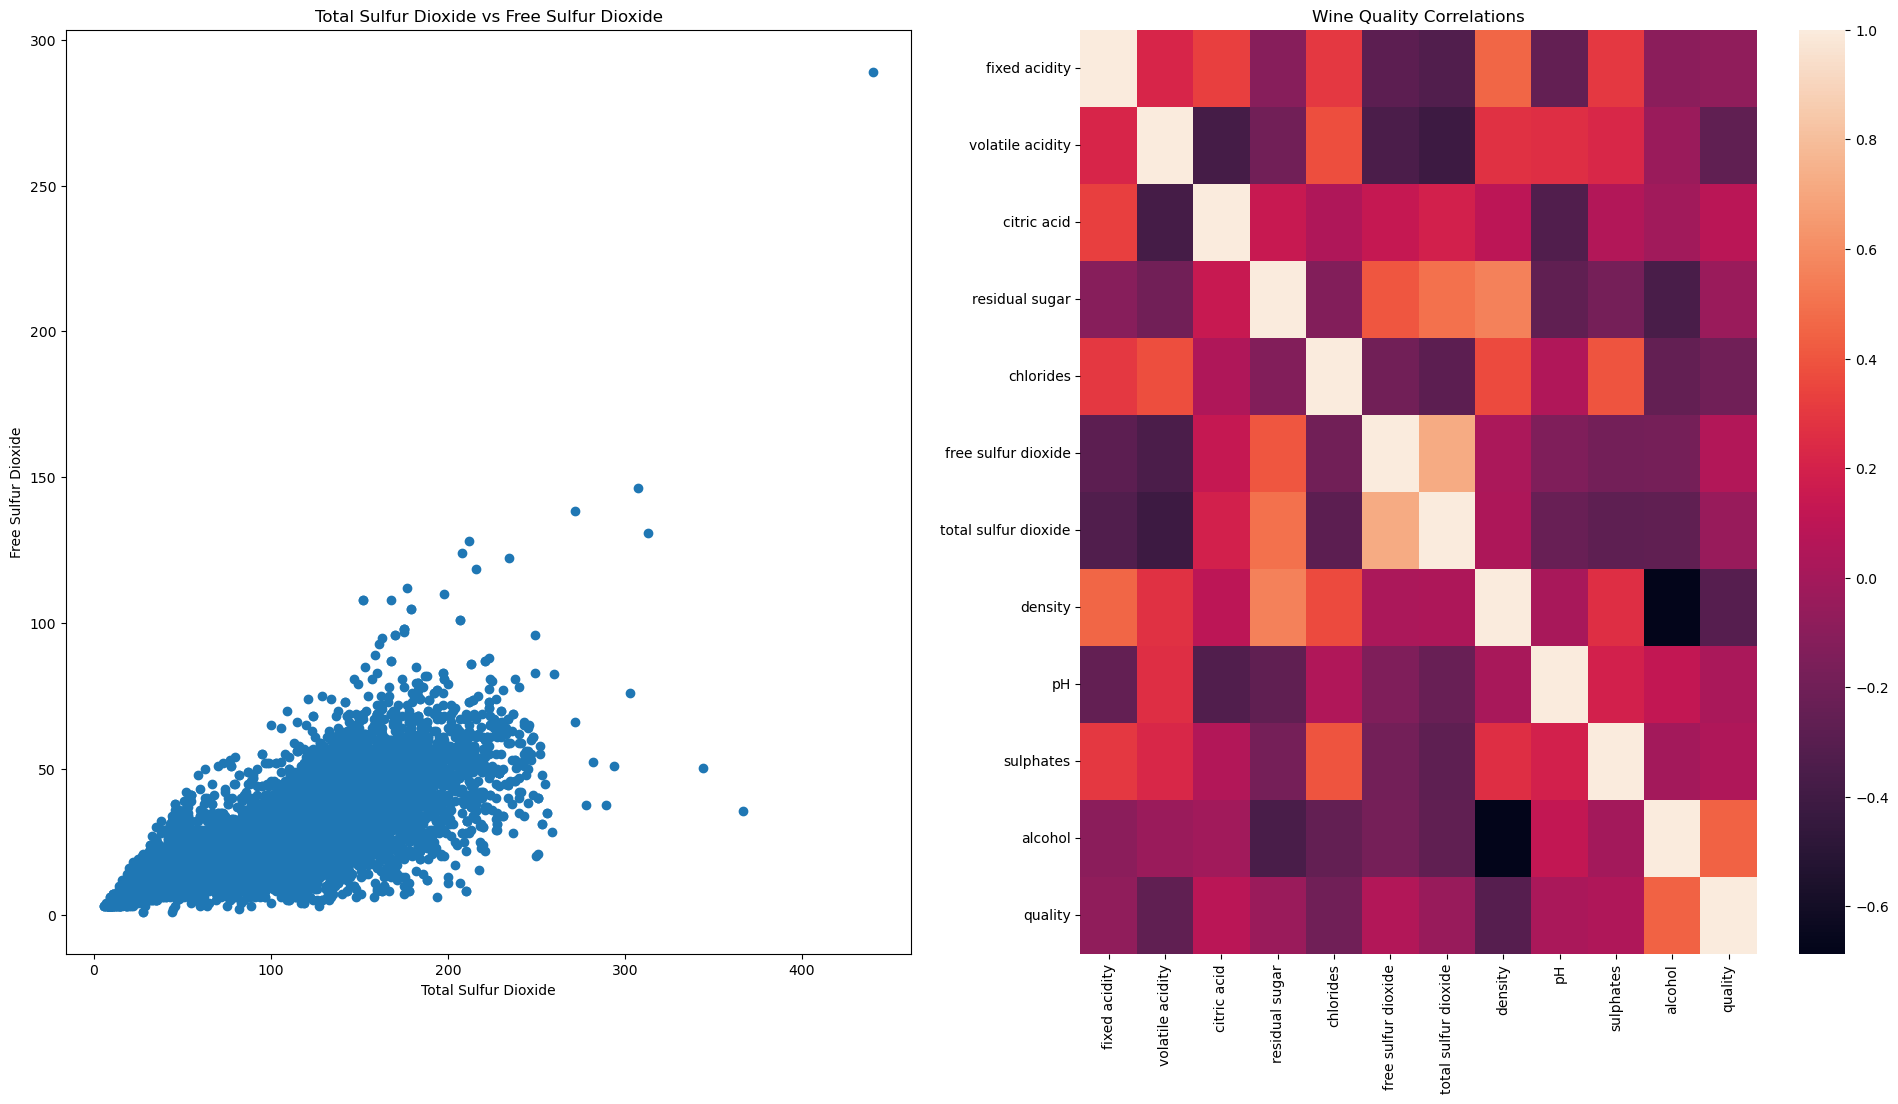

In [42]:
# Calculate correlations
wine_corr = winequality.corr().unstack().sort_values().drop_duplicates()
print(wine_corr) # 'total sulfur dioxide' and 'free sulfur dioxide' have the largest correlation

# Set figure size
plt.figure(figsize = (24, 12))

# Scatterplot
plt.subplot(1, 2, 1)
plt.scatter(winequality['total sulfur dioxide'], winequality['free sulfur dioxide'])
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide')

plt.subplot(1, 2, 2)
sns.heatmap(winequality.corr())
plt.title('Wine Correlations')

#### Correlations

Text(0.5, 1.0, 'Quality vs Alcohol')

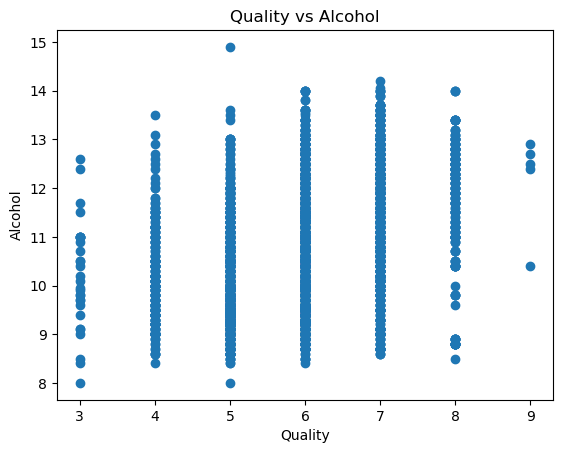

In [5]:
wine_corr # 'wine quality' is most correlated with 'alcohol'

# Scatterplot
plt.scatter(winequality['quality'], winequality['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Quality vs Alcohol')

#### Average alcohol content per quality level

In [47]:
# Determine average alcohol content for each quality
avg_alcohol_by_quality = winequality.groupby('quality')['alcohol'].mean()

# Store average alcohol content for 'best' wine
avg_alcohol_for_best_wine = avg_alcohol_by_quality[winequality['quality'].max()]
print(f'The average alcohol content for the best wine is {avg_alcohol_for_best_wine}.')

The average alcohol content for the best wine is 12.18.


wine type                  Red     White
fixed acidity         0.124052 -0.113663
volatile acidity     -0.390558 -0.194723
citric acid           0.226373 -0.009209
residual sugar        0.013732 -0.097577
chlorides            -0.128907 -0.209934
free sulfur dioxide  -0.050656  0.008158
total sulfur dioxide -0.185100 -0.174737
density              -0.174919 -0.307123
pH                   -0.057731  0.099427
sulphates             0.251397  0.053678
alcohol               0.476166  0.435575
quality               1.000000  1.000000


Text(0, 0.5, 'Fixed Acidity')

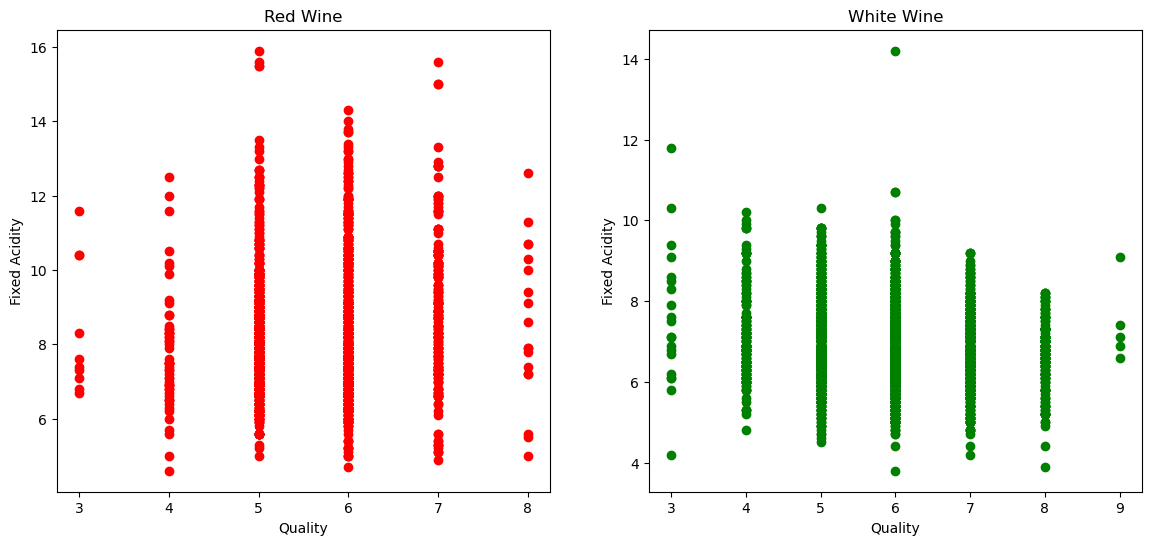

In [48]:
quality_corr = winequality.groupby('wine type').corr()['quality'].unstack(level = 0)
print(quality_corr) # Fixed acidity has a contradictory relationship across wine type

# Set figure size
plt.figure(figsize = (14, 6))
plt.grid(False)

# Assumuption: Plotting quality and fixed acidity separately based on wine type
# Plot Red wine 
plt.subplot(1, 2, 1)
plt.scatter(winequality[winequality['wine type'] == 'Red']['quality'], 
            winequality[winequality['wine type'] == 'Red']['fixed acidity'],
           color = 'red')
plt.title('Red Wine')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')

# Plot White Wine
plt.subplot(1, 2, 2)
plt.scatter(winequality[winequality['wine type'] == 'White']['quality'], 
            winequality[winequality['wine type'] == 'White']['fixed acidity'],
           color = 'green')
plt.title('White Wine')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')

In [8]:
# Create new dataframe with averages of each column by wine type
avg_df = winequality.groupby(['wine type']).mean().transpose()

# Calculate average of each column and add to new dataframe
avg_df['Overall'] = winequality.drop('wine type', axis = 1).mean()

# Calculate Index for White and Red Wine
avg_df['White_Index'] = avg_df['White'] / avg_df['Overall'] * 100
avg_df['Red_Index'] = avg_df['Red'] / avg_df['Overall'] * 100
print(avg_df.idxmax(axis = 0)) 
avg_df

# Assumption: the largest variable for white index and the largest variable for red index
# largest index for white wine is 'total sulfur dioxide' and for red is 'chlorides'

wine type
Red            total sulfur dioxide
White          total sulfur dioxide
Overall        total sulfur dioxide
White_Index    total sulfur dioxide
Red_Index                 chlorides
dtype: object


wine type,Red,White,Overall,White_Index,Red_Index
fixed acidity,8.319637,6.854788,7.215307,95.003409,115.305381
volatile acidity,0.527821,0.278241,0.339666,81.916094,155.393979
citric acid,0.270976,0.334192,0.318633,104.882822,85.043114
residual sugar,2.538806,6.391415,5.443235,117.419411,46.641480
chlorides,0.087467,0.045772,0.056034,81.686956,156.095866
free sulfur dioxide,15.874922,35.308085,30.525319,115.668192,52.005752
total sulfur dioxide,46.467792,138.360657,115.744574,119.539648,40.146843
density,0.996747,0.994027,0.994697,99.932717,100.206098
pH,3.311113,3.188267,3.218501,99.060612,102.877500
sulphates,0.658149,0.489847,0.531268,92.203299,123.882579
